<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Работа для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Подключаем библиотеки, производим первичный анализ данных
</div>

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Меняем название стоблцов и типы данных
</div>

In [5]:
data.rename(columns = {'Year_of_Release':'year'}, inplace=True)
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data['year'] = data['year'].astype('Int64')

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  rating        9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Заменили типы: yeat на int, тк это целочисленная переменная datetime тут не нужен, critic_score на int, тк по итогом unique(), данные так же целочисленные, user_score на float, так данные числовые, но с плавующей точкой, также заменили данные tbd на nan
</div>

In [13]:
data.isnull().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

In [14]:
data[data['name'].isnull()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [15]:
data = data.dropna(subset = ['name'])
data['year'] = data['year'].fillna(0)

In [16]:
data.isnull().sum()

name               0
platform           0
year               0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8576
user_score      9123
rating          6764
dtype: int64

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Проверили пропуски, год заполнили 0, тк удалять данные - слишком большие потери, строки с пропусками в название - удалили тк их всего 2, обработать строки в оценках на данный момент невозможно, тк нет информации откуда пропуски(ошибка машины, человека или игры еще слишком новые для оценок), данных слишком много удалить их нельзя
</div>

In [19]:
data.duplicated().sum()

0

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Незабываем проверить на явные дубликаты
</div>

In [20]:
data['year'].max()

2016

In [21]:
data[data['year'] > 0]['year'].min()

1980

Text(0, 0.5, 'Количество продаж')

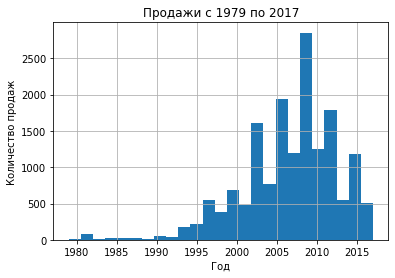

In [22]:
data['year'].hist(bins = 25, range=(1979, 2017))
data[data['year'] > 0]['year'].describe()
plt.title('Продажи с 1979 по 2017')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

Text(0, 0.5, 'Количество продаж')

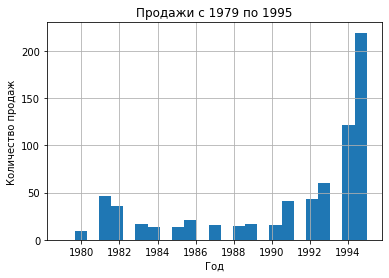

In [23]:
data['year'].hist(bins = 25, range=(1979, 1995))
plt.title('Продажи с 1979 по 1995')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Судя по графику, игры до 1994 года не так важны, тк это сфера только появлялась и количество продукта, было очень мало
</div>

Text(0, 0.5, 'Количество продаж')

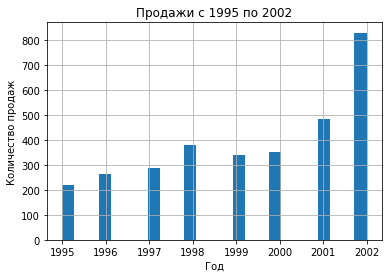

In [24]:
data['year'].hist(bins = 25, range=(1995, 2002))
plt.title('Продажи с 1995 по 2002')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

Text(0, 0.5, 'Количество продаж')

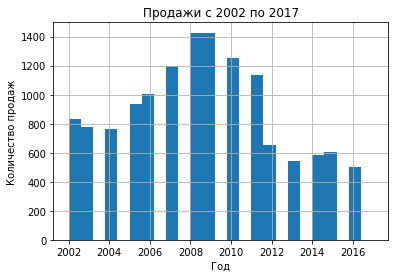

In [25]:
data['year'].hist(bins = 25, range=(2002, 2017))
plt.title('Продажи с 2002 по 2017')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Наш основной промежуток данных, сфера уже популярна, количество контента выросло, можно урезать его еще до самого важного, года в которые выпускалось больше всего контента 2006 - 2011, в эти года выпускали минимум 1000 игр, что очень много
</div>

Text(0, 0.5, 'Количество продаж')

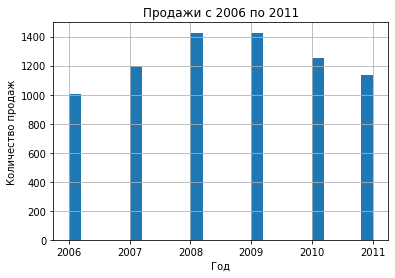

In [26]:
data['year'].hist(bins = 25, range=(2006, 2011))
plt.title('Продажи с 2006 по 2011')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

In [27]:
data_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
data_platforms

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Платформ очень много, рассмотрим топ 10 по продажам
</div>

In [28]:
data_platforms_top_10 = data_platforms.reset_index().iloc[0:10]
data_platforms_top_10

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Text(0, 0.5, 'Количество продаж')

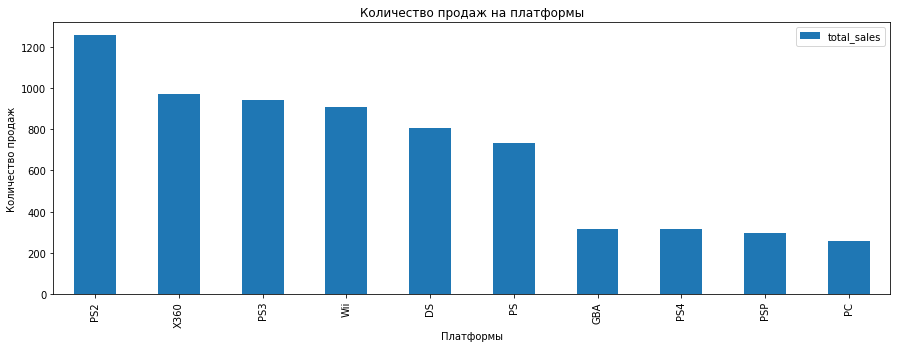

In [29]:
data_platforms_top_10.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5))
plt.title('Количество продаж на платформы')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Наш топ-10 по продажам
</div>

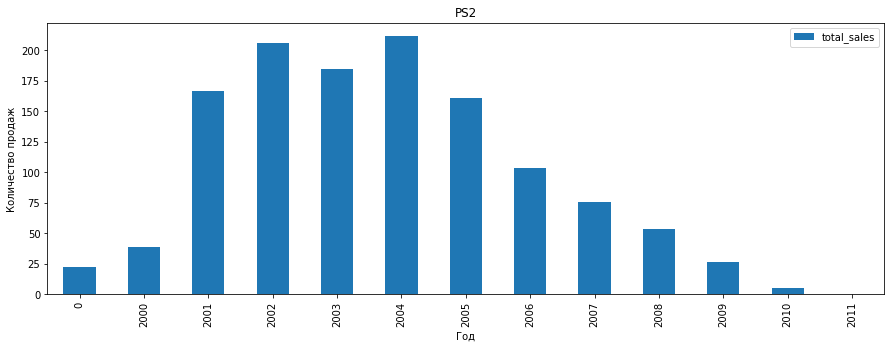

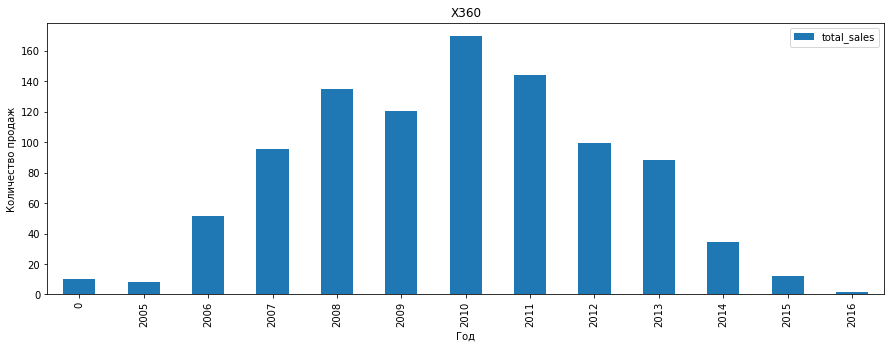

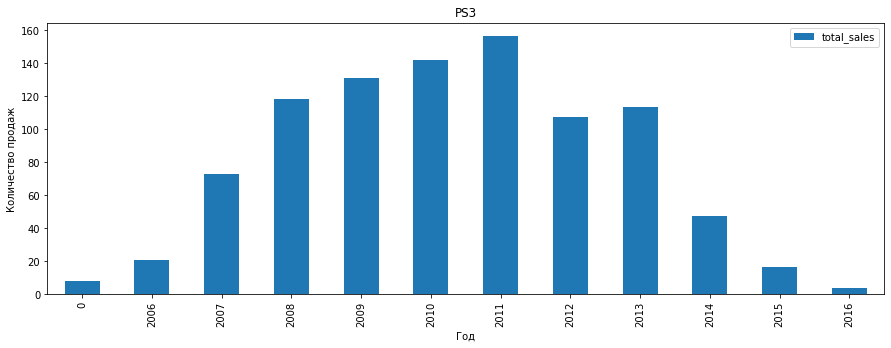

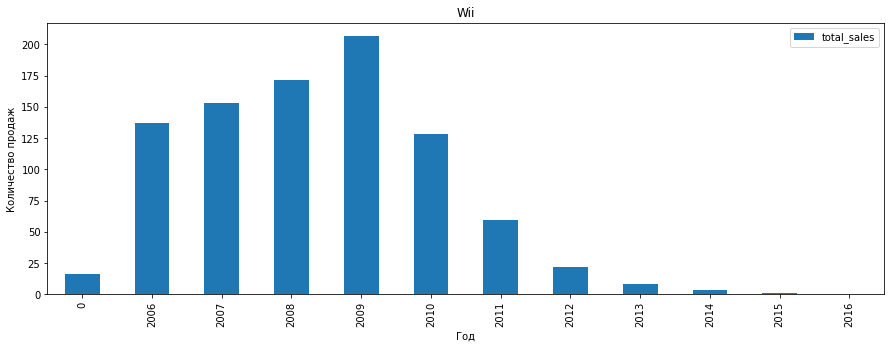

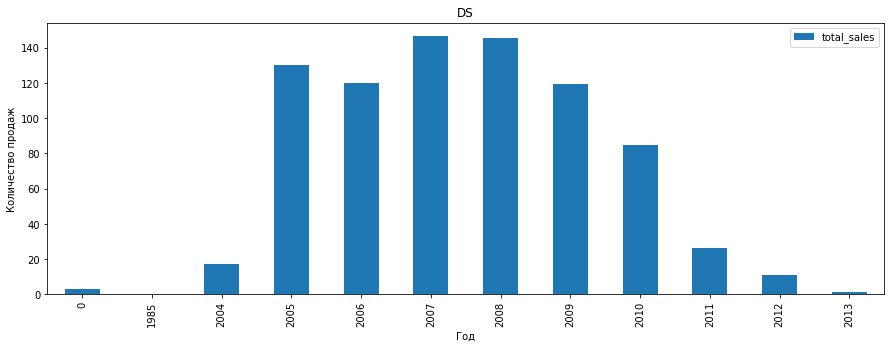

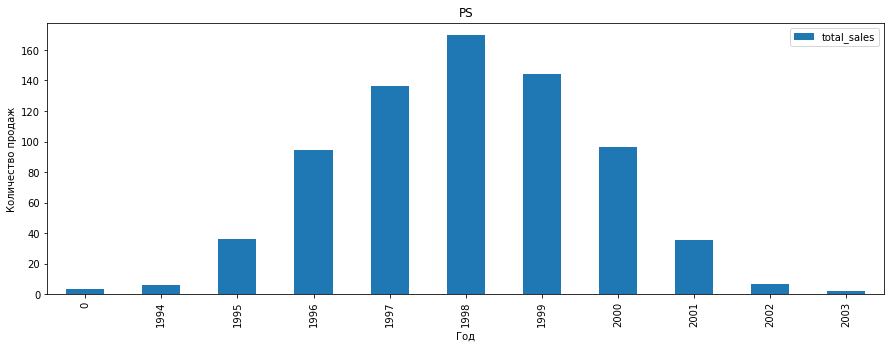

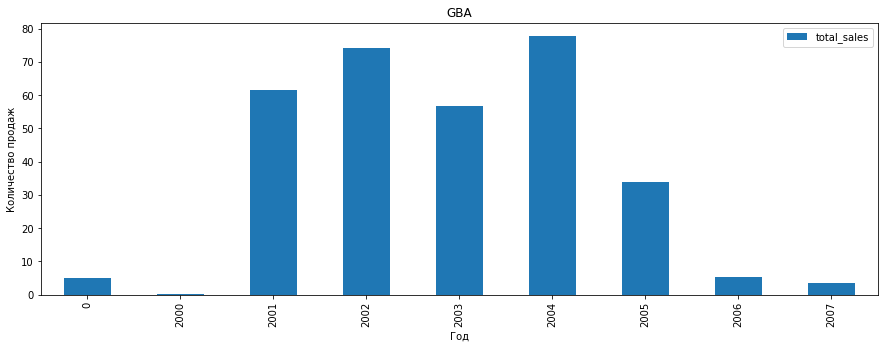

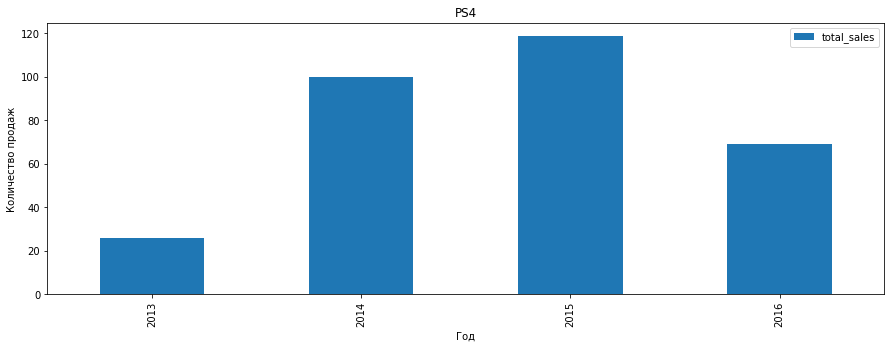

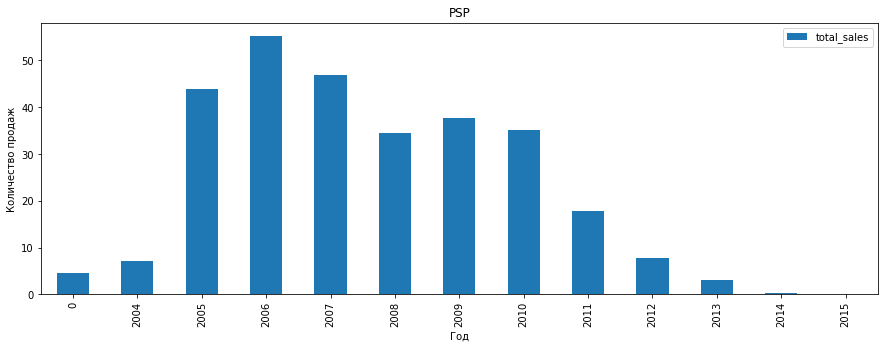

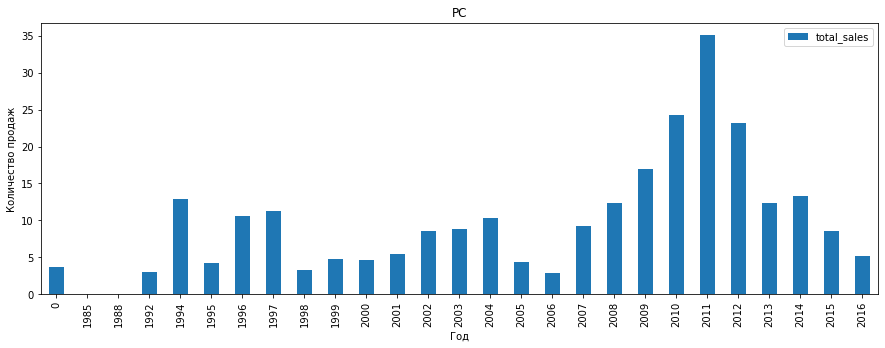

In [30]:
name_platforms_top_10 = data_platforms_top_10['platform']
for plat in name_platforms_top_10:
    data[data['platform'] == plat].pivot_table(index='year', values='total_sales', aggfunc='sum').plot(kind='bar',figsize=(15,5))
    plt.title(plat)
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
В основном платформы существуют около 9-10 лет, есть исключения, такие как GBA и PC. На пики платформы находятся около 5-6 лет из своих 10, 2 года идет в среднем на "разгон" до популярности. Так же заметно, что пик популярности начинается с 2006, поэтому актуальный период начну именно с 2006 года
</div>

In [31]:
actual_data = data.query('year >= 2014 and year <=2016')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Взял период 2014-2016
</div>

Text(0.5, 1.0, 'Количество продаж на платформы по годам')

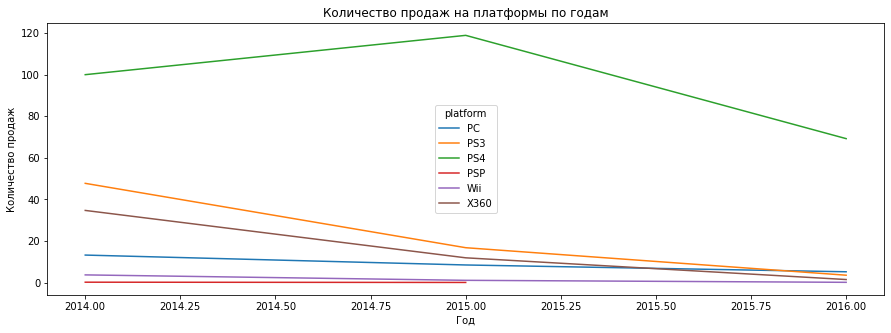

In [32]:
actual_data.query('platform in @name_platforms_top_10').pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж на платформы по годам')

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отличный тип графика!

Text(0.5, 1.0, 'Продажи на XOne')

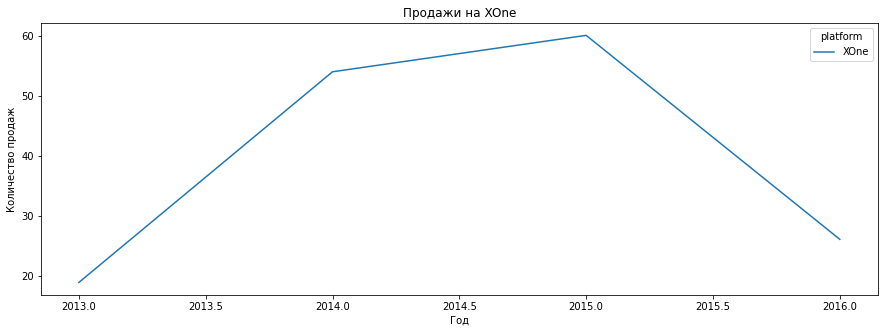

In [33]:
data[data['platform'] == 'XOne'].pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Продажи на XOne')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
К 2016 году многие платформы, теряют свою популярность или уже закончили свое существование. Но выделятся больше всего новейшний потомок ps - ps4, также стоит взять во внимание стабильность pc, хоть какими-то большими показателями не обладает, но по прошлым анализам можно сказать, что перспектива есть, также можно обратить внимание на продукт, который не вошел в топ 10, но является предком одного из пополярнейших X360 - XOne, тк он новый продажи не очень большие, но перспективы так же есть.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Наиболее перспективные платформы на 2017 год ps4, XOne и PC, из-за нового поколения не стоит вкладываться в ps3 и x360
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Построим график с усиками, чтобы проверить свои слова
</div>

Text(0.5, 1.0, 'Продажи по платформам')

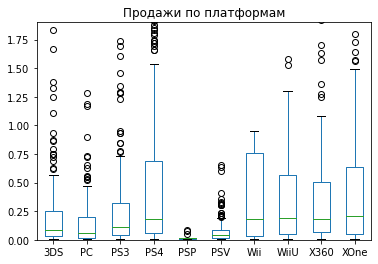

In [34]:
actual_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9))
plt.title('Продажи по платформам')

Text(0.5, 1.0, 'Продажи по платформам')

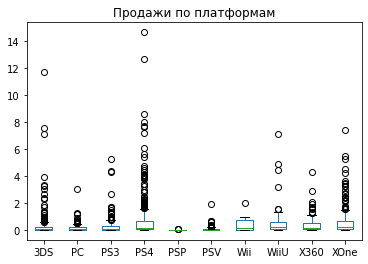

In [35]:
actual_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box')
plt.title('Продажи по платформам')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
XOne действительно достойный претендент, тк показатели почти на уровне ps4, да и в целом анализ ситуации был верным
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Нам необходимо понять, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.Для этого необходимо Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Для этого необходимо выбрать популярную платформу, возьмем PC и 2 самые перспективные платформы ps4 и XOne
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Догадка оказась ошибочка, в случае psp, оценки не влияют на продажи, но можно сказать, что оценки критиков и игроков совпадают, проверим наши перспективные платформы
</div>

In [36]:
data_xone = actual_data.query('platform == "XOne"')
data_ps4 = actual_data.query('platform == "PS4"')
data_pc = actual_data.query('platform == "PC"')

In [37]:
xone_cor = data_xone[['critic_score','user_score', 'total_sales']]
xone_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


In [38]:
ps4_cor = data_ps4[['critic_score','user_score', 'total_sales']]
ps4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


In [39]:
pc_cor = data_pc[['critic_score','user_score', 'total_sales']]
pc_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.466099,0.174634
user_score,0.466099,1.000000,-0.071597
total_sales,0.174634,-0.071597,1.000000


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
По нашим лучшим платформам, можно сказать, что оценки  не сильно влиюят, НО оценки критиков имеют намного большее значение, чем пользователей
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Пора проверить и наши жанры игр
</div>

Text(0.5, 1.0, 'Продажи по жанрам')

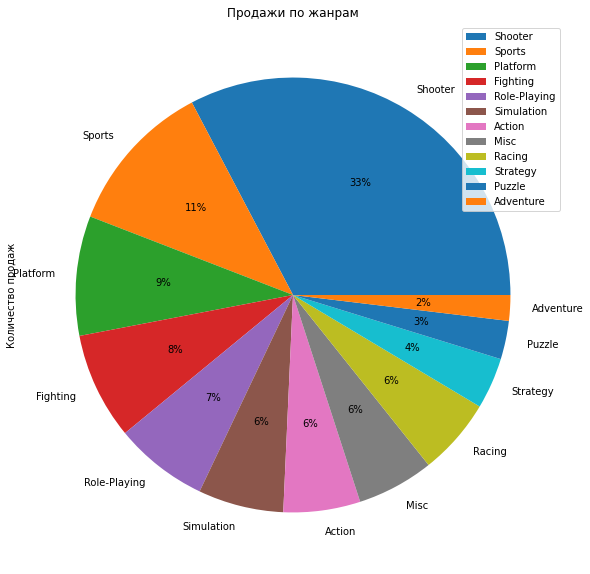

In [40]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, by = 'total_sales').plot(kind='pie',autopct = '%1.0f%%', figsize=(10,10), y= 'total_sales')
plt.ylabel('Количество продаж')
plt.title('Продажи по жанрам')

Text(0.5, 1.0, 'Продажи по жанрам')

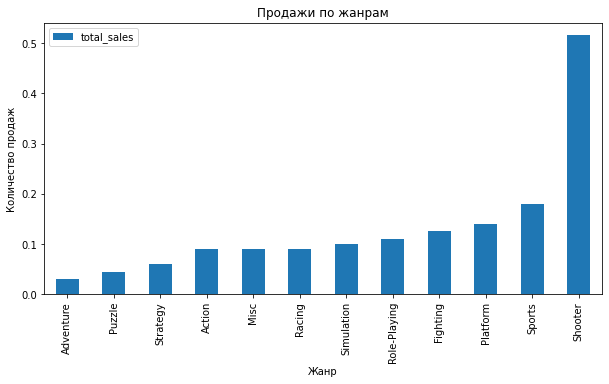

In [41]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=True, by = 'total_sales').plot(kind='bar', figsize=(10,5), y= 'total_sales')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи по жанрам')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Стало намного лучше, с большим отрывом лидируют игры shooter, за ними sports и platform, игры adventure, puzzle не пользуются популярностью. 
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Общую картину мы получили, но следует изучить данные и по регионам, раз данные позволяют нам это сделать!
</div>

Text(0.5, 1.0, 'Продажи по платформам в америке')

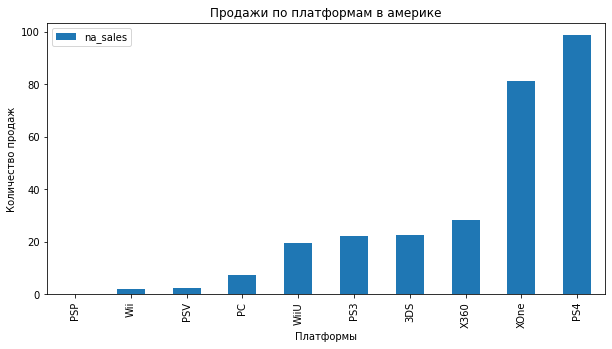

In [42]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'na_sales').plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Продажи по платформам в америке')

Text(0.5, 1.0, 'Продажи по жанрам в америке')

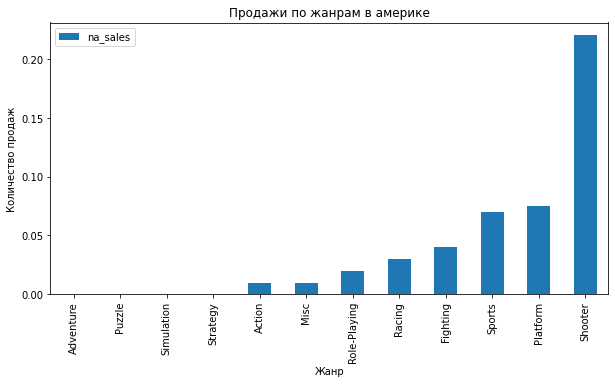

In [43]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(ascending=True, by = 'na_sales').plot(kind='bar', figsize=(10,5), y= 'na_sales')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи по жанрам в америке')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Пользователи в америке, больше всего предпочитают наших фаворитов ps4 и xOne, после недалекий предок Х360, PSP и Wii в америке уже на закате. Ситуация с играми такая же, как в общем анализе
</div>

Text(0.5, 1.0, 'Продажи по платформам в европе')

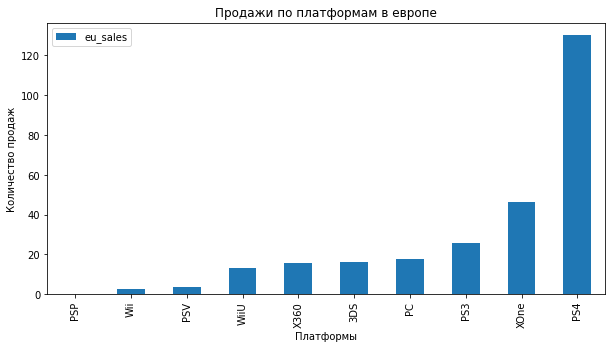

In [44]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'eu_sales').plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Продажи по платформам в европе')

Text(0.5, 1.0, 'Продажи по жанрам в европе')

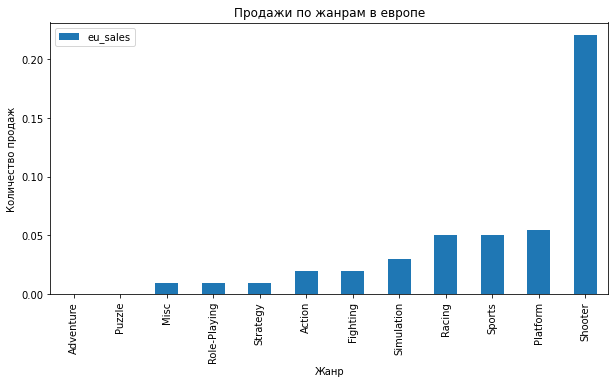

In [45]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(ascending=True, by = 'eu_sales').plot(kind='bar', figsize=(10,5), y= 'eu_sales')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи по жанрам в европе')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Ситуация в Европе почти, как в Америке, но ps3 популярнее x360, в остальном ситуация топ-3 платформы такие же, ситуация с играми также повторяется
</div>

Text(0.5, 1.0, 'Продажи по платформам в Японии')

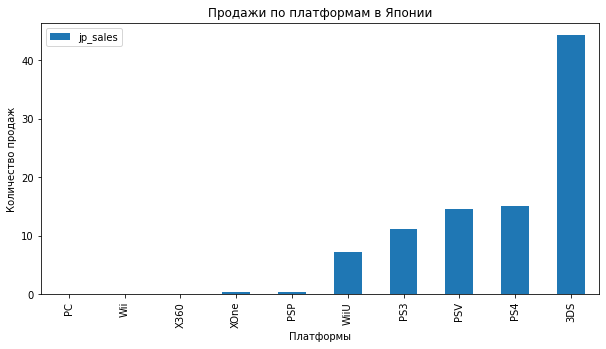

In [46]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=True, by = 'jp_sales').plot(kind = 'bar', figsize=(10,5))
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Продажи по платформам в Японии')

Text(0.5, 1.0, 'Продажи по жанрам в Японии')

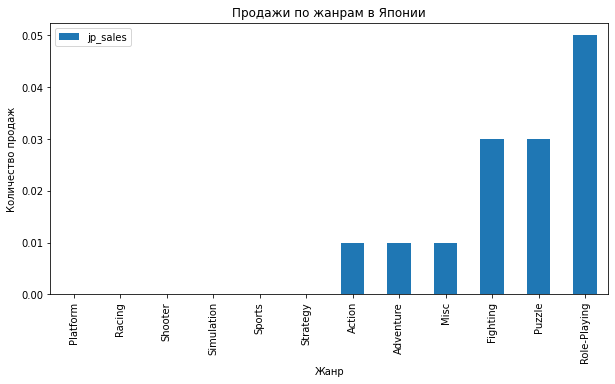

In [47]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(ascending=True, by = 'jp_sales').plot(kind='bar', figsize=(10,5), y= 'jp_sales')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи по жанрам в Японии')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Ситуация в Японии не похожа на европу и америку, тут самые популярные платформы 3ds, ps4, psv, непопулярные pc и wii x360. С играми ситуация следующая: самые популярные role-playning, puzzle, fighting, непопулярные patform, racing. Похоже японцы любят играть в игры, которые подходят к портативным платформам, как и сами портативные приставки
</div>

In [48]:
actual_data['region'] = actual_data['eu_sales'] + actual_data['jp_sales'] + actual_data['na_sales']
actual_data['region']

/tmp/ipykernel_48/4127826139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['region'] = actual_data['eu_sales'] + actual_data['jp_sales'] + actual_data['na_sales']


31       12.25
42       10.65
47       10.94
77        7.30
87        6.70
         ...  
16703     0.01
16707     0.01
16710     0.01
16712     0.01
16714     0.01
Name: region, Length: 1689, dtype: float64

In [49]:
data_esrb = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
data_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
esrb рейтинг действительно влияет на продажи в регионах, например японцы не любят игры с рейтингом М, а американцы больше всех любят игры с рейтингами M, E10+
</div>


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Настало время проверить гипотезы:
    <li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</li>
     <li>Средние пользовательские рейтинги жанров Action  и Sports  разные.</li>
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    <li>h0: пользовательские рейтинги Xone равны пользовательским рейтингам PC</li>
    <li>h0: пользовательские рейтинги Xone отличаются от пользовательских рейтингов PC</li>
</div>

In [50]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705


In [51]:
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
По итогам проверки первая гипотеза не подтвердилась, рейтинги разные
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Средние пользовательские рейтинги жанров Action  и Sports  разные.
    <li>h0: пользовательские рейтинги Action равны пользовательским рейтингам Sports</li>
    <li>h0: пользовательские рейтинги Action отличаются от пользовательских рейтингов Sports</li>
</div>

In [52]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


In [53]:
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
По итогам проверки второй гипотезы, гипотеза подтвердилась, рейтинги разные
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Использовал ttest_ind, тк он используется как раз для анализа двух независимых выборок, которые по гипотезе имеют 2 одинаковых средних значения и размер выборок у нас маленькие, как раз для t-теста
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
По итогам работы, мы проверили анализ, какие критерии влияют на продажу игр, в разных регионах на разные платформы. По итогам анализа получили следующие данные:
<ul> На продажу игр влияют
    <li>Регион (какие жанры и платформы популярны, какой рейтинг получила от ассоциации)</li>
    <li>Рейтинг критиков</li> 
</ul>
<ul> Так в европе ситуация на 2016 год по популярности, следующая(от большего к меньшему):
    <li>ESRB: M, E, T</li>
    <li>Платформы: в PS4, XboxoNE, PS3, PC</li> 
    <li>Жанры: shotter, platform, Sports, racing, simulation</li> 
</ul>    
<ul> Так в америке ситуация на 2016 год по популярности, следующая(от большего к меньшему):
    <li>ESRB: M, E, T</li>
    <li>Платформ: PS4, XboxOne, Xbox360, 3DS, PS3</li> 
    <li>Жанры: Shooter, platform, Sports, Fighting, racing</li> 
</ul>
<ul> Так в Японии ситуация на 2016 год по популярности, следующая(от большего к меньшему):
    <li>ESRB: T, E, M</li>
    <li>Платформы: 3DS, PS4, PSV, PS3, WiiU</li> 
    <li>Жанры: Role-Playing, Puzzle, Fighting, Misc, Adventure</li> 
</ul>
<ul> В мире наиболее перспективные направления игр по результатам анализа
    <li>Платформы: PC, PS4, XOne</li> 
    <li>Жанры: Shooter, Sports, Platform</li> 
</ul>
    <ul> В мире наиболее неперспективные направления игр по результатам анализа
    <li>Платформы: X360, PS3, Wii</li> 
    <li>Жанры: Adventure, Puzzle</li> 
</ul>
<ul> Проверили 2 гипотезы
    <li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</li>
    Первая опровергнута, рейтинги разные
    <li>Средние пользовательские рейтинги жанров Action  и Sports  разные.</li>
    Вторая подтверждена, рейтинги действительно разные
</ul> 
</div>